### Bias-variance tradeoff
We do this to find the best order of complexity of our model. This is done based on the same method as used in the labs.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

In [3]:
# Read Data
y = pd.read_pickle("./pickles/y.pkl").to_numpy()
tx = pd.read_pickle("./pickles/x.pkl").to_numpy()

y = np.reshape(y, len(y))


In [4]:
def least_squares(y, tx):
    """calculate the least squares."""
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)


In [33]:
def bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te):
    """visualize the bias variance decomposition."""
    f = plt.figure(figsize = (15,10))
    rmse_tr_mean = np.expand_dims(np.mean(rmse_tr, axis=0), axis=0)
    rmse_te_mean = np.expand_dims(np.mean(rmse_te, axis=0), axis=0)
    plt.plot(
        degrees,
        rmse_tr.T,
        'b',
        linestyle="-",
        color=([0.7, 0.7, 1]),
        label='train',
        linewidth=0.3)
    plt.plot(
        degrees,
        rmse_te.T,
        'r',
        linestyle="-",
        color=[1, 0.7, 0.7],
        label='test',
        linewidth=0.3)
    plt.plot(
        degrees,
        rmse_tr_mean.T,
        'b',
        linestyle="-",
        label='train',
        linewidth=3)
    plt.plot(
        degrees,
        rmse_te_mean.T,
        'r',
        linestyle="-",
        label='test',
        linewidth=3)
    plt.xlabel("degree")
    plt.ylabel("error")
    plt.title("Bias-Variance Decomposition")
    plt.savefig("bias_variance")


In [36]:
from scripts.proj1_helpers import *

def bias_variance(y, x):
    
    seeds = range(10)
    ratio_train = 0.01
    degrees = range(5)
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)

        # Split data
        y_tr, x_tr, y_te, x_te = split_data(y, x, ratio_train, seed)
        
        for degree in degrees:
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)

            w = least_squares(y_tr, tx_tr)
            
            loss_tr = compute_mse(y_tr, tx_tr, w)
            loss_te = compute_mse(y_te, tx_te, w)
            
            rmse_tr[index_seed, degree-1] = np.sqrt(2*loss_tr)
            rmse_te[index_seed, degree-1] = np.sqrt(2*loss_te)

    return degrees, rmse_tr, rmse_te

In [37]:
degrees, rmse_tr, rmse_te = bias_variance(y, tx)


In [38]:
print(rmse_tr[-1], rmse_te[-1])

[0.83169763 0.7813393  0.77167103 0.75034029 0.95419042] [0.82715317 0.79534969 0.78819644 0.79201588 0.94927985]


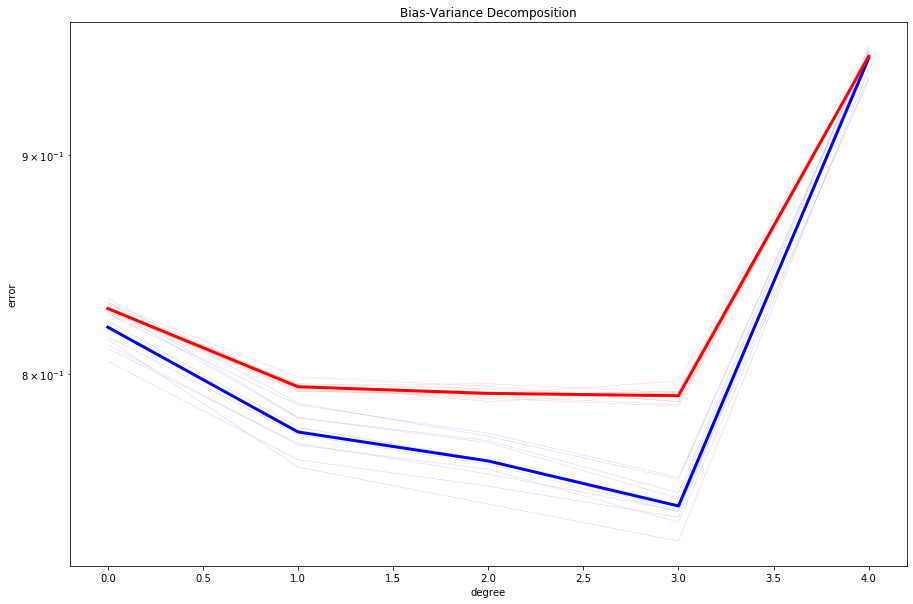

In [39]:
bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)